# ADF Demo

In [1]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Just Noise (No Trend)
The p-value is very small, close to zero (rejects H0),
i.e. the time series is **stationary**.

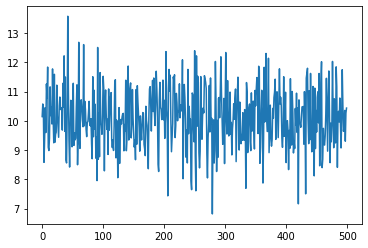

In [2]:
X = np.random.normal(loc=10, scale=1, size=(500,))
plt.plot(X);

In [3]:
adf, pval, usedlags, _, _, _ = adfuller(X, regression='c', autolag='BIC')
print(f"p-value: {pval}")
print(f"ADF Statistic: {adf}")
print(f"used lags: {usedlags}")

p-value: 0.0
ADF Statistic: -19.028840141124792
used lags: 1


# Noise + Trend
The p-value is much larger than 0.0 (fails to reject H0), 
i.e. the time series is **non-stationary**.

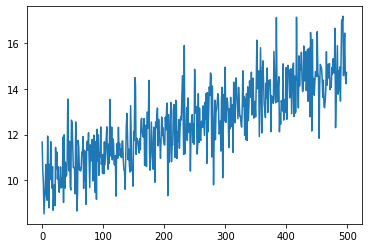

In [4]:
X = np.random.normal(loc=10, scale=1, size=(500,)) + np.arange(500) * 0.01
plt.plot(X);

In [5]:
# BIC is faster than AIC
adf, pval, usedlags, _, _, _ = adfuller(X, regression='c', autolag='BIC')
print(f"p-value: {pval}")
print(f"ADF Statistic: {adf}")
print(f"used lags: {usedlags}")

p-value: 0.712053256699237
ADF Statistic: -1.1075460704105455
used lags: 11


# How much trend is needed?

In [6]:
%%time
n_obs = 500
f_min, f_max, n_trial = 0.001, 0.01, 20
for f in range(n_trial+1):
    # generate trendy noise
    factor = f/n_trial * (f_max - f_min) + f_min
    trend = + np.arange(n_obs) * factor
    noise = np.random.normal(loc=10, scale=1, size=(n_obs,))
    X = noise + trend
    # ADF test
    adf, pval, _, _, _, _ = adfuller(X, regression='c', autolag='BIC')
    # show results
    print("trend: {:5.4f} | p-values: {:5.4f} | ADF: {:>6.3f}".format(factor, pval, adf))

trend: 0.0010 | p-values: 0.0000 | ADF: -24.757
trend: 0.0015 | p-values: 0.0000 | ADF: -22.828
trend: 0.0019 | p-values: 0.0000 | ADF: -23.103
trend: 0.0024 | p-values: 0.0000 | ADF: -18.519
trend: 0.0028 | p-values: 0.0000 | ADF: -11.718
trend: 0.0033 | p-values: 0.0000 | ADF: -6.373
trend: 0.0037 | p-values: 0.0000 | ADF: -8.909
trend: 0.0042 | p-values: 0.0002 | ADF: -4.564
trend: 0.0046 | p-values: 0.0064 | ADF: -3.567
trend: 0.0051 | p-values: 0.0014 | ADF: -3.993
trend: 0.0055 | p-values: 0.0030 | ADF: -3.788
trend: 0.0060 | p-values: 0.3441 | ADF: -1.875
trend: 0.0064 | p-values: 0.0835 | ADF: -2.648
trend: 0.0069 | p-values: 0.5425 | ADF: -1.482
trend: 0.0073 | p-values: 0.1958 | ADF: -2.229
trend: 0.0078 | p-values: 0.6426 | ADF: -1.270
trend: 0.0082 | p-values: 0.2179 | ADF: -2.169
trend: 0.0087 | p-values: 0.3596 | ADF: -1.842
trend: 0.0091 | p-values: 0.4005 | ADF: -1.760
trend: 0.0095 | p-values: 0.6383 | ADF: -1.280
trend: 0.0100 | p-values: 0.6361 | ADF: -1.285
CPU time

# A note for removing trends
When we would try to remove the trend from a time series (e.g. integral/fractal differentiation),
we must be aware that the threshold is more like a threshold area (e.g. see below how p-values decline although the trend becomes steeper).

Thus, it would be more prudent to start at $d=1$ (full integral diff) where time series can be assumed to be stationary, then reduce $d$ towards zero (by fractal diff), and stop when the p-value exceeds a threshold for the first time.

# Links
* https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html